# GRASP

### Algoritmo  
El  algoritmo  GRASP  constaráde  dos componentes:  construcciónde  soluciones Greedy probabilísticas,y optimización de las mismas mediante el algoritmo debúsqueda local.   El algoritmo Greedy probabilístico es el siguiente:§Construcciónde  soluciones  Greedy  probabilísticas:  El  mecanismo  GRASPdegeneración se basa inicialmente en seleccionar las ciudades con.   
Para aplicarlo se mantendrándos  listas,una  que  almacenamayor  potencial.  Los  elementos seleccionados seráneliminados  de  lalista,reemplazándose  por  los  siguientes elementos  inmediatamente  siguientes  y aún  no  incluidos.  
De  esta  forma  se mantieneconstantes las listamientras hayasuficientes elementos.Una vez generada cada soluciónGreedy probabilísticainicial se aplicaráel algoritmo de BúsquedaLocal como de costumbre.
### Valores de los Parámetros
Se generarán10soluciones Greedy probabilísticas.   Estas   soluciones   serán posteriormente  optimizadas  mediante  una únicaejecucióndel  algoritmo  de Búsqueda Local para cada una de ellas. El parámetro l = 0.1 · n.
### Ejecuciones
Se  realizaráun  total  de  tres  ejecuciones,  correspondientes  a  ejecutar  el  algoritmo GRASP a los tres casos (data sets) del problema.


---
## Librerías
- pandas: necesaria para la representación de resultados.
- datetime: necesaria para la obtención de una semilla inicial que genere las demás semillas.
- ipynb: necesaria para la carga de algoritmos de otros ficheros.

In [1]:
import pandas as pd
from datetime import datetime
from ipynb.fs.full.algorithm import * # Importación del algoritmo grasp
from ipynb.fs.full.auxiliary_functions import * # Importación de funciones auxiliares para la carga y representación de datos

---
## Dataframe
Creación del dataframe que almacenará las estadísticas de cada ejecución.

In [2]:
mux = pd.MultiIndex.from_product([["St70","Ch130","A280"], ['S. ini',"S. opt","Mej. S.",'#Ev',"T(seg)"]])
estadisticas = pd.DataFrame(
    columns=mux,
    index = ["It "+str(indice) for indice in range(1,11)] + ["Media", "Des. tip.","Sum"]
)

---
## Lectura de ficheros y ejecución del algoritmo
Para poder ejecutar correctamente el algoritmo de forma concurrente en Jupyter, este debe ser cargado de forma externa. Para ello se ha usado la librería ipynb.

In [3]:
st70 = cargar_fichero("st70")
ch130 = cargar_fichero("ch130")
a280 = cargar_fichero("a280")

### Generación de la semilla

In [4]:
semillas = []
dt = datetime.now()
semilla = random.randint(0,dt.microsecond)
print("Semilla: ",semilla)

Semilla:  588309


#### st70

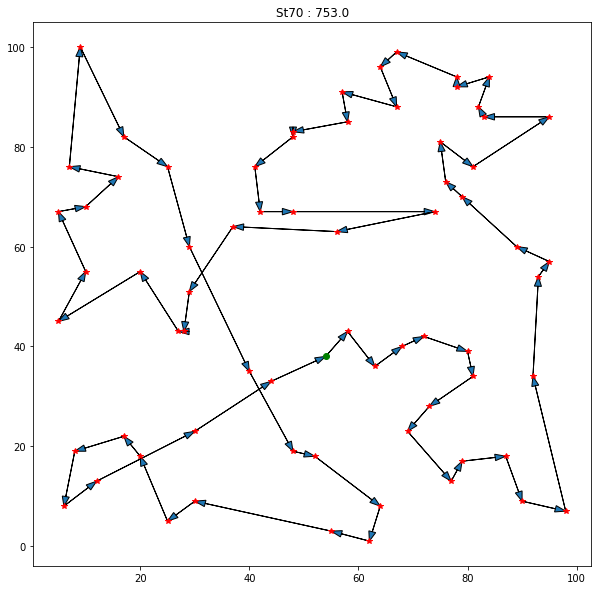

In [5]:
solucion_st70, coste_st70,estadisticas_st70 = grasp(10,semilla,st70)
representacion(solucion_st70, "St70", coste_st70)
agregar_resultados(estadisticas,"St70",estadisticas_st70)

#### ch130


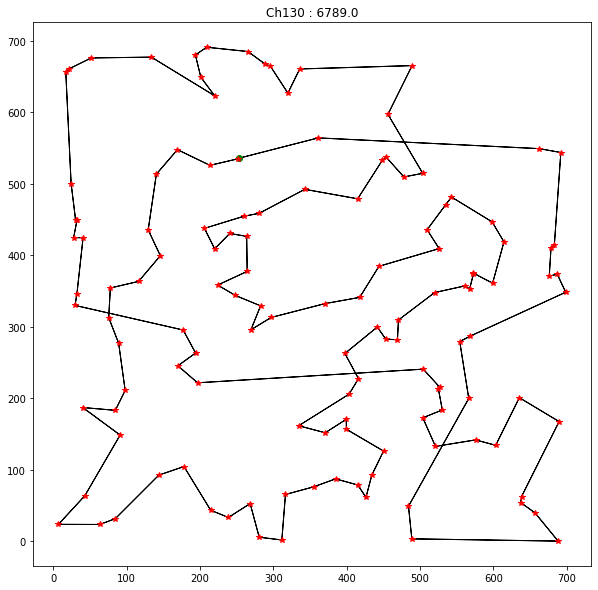

In [6]:
solucion_ch130, coste_ch130, estadisticas_ch130 = grasp(10,semilla,ch130)
representacion(solucion_ch130, "Ch130", coste_ch130)
agregar_resultados(estadisticas,"Ch130",estadisticas_ch130)

#### a280

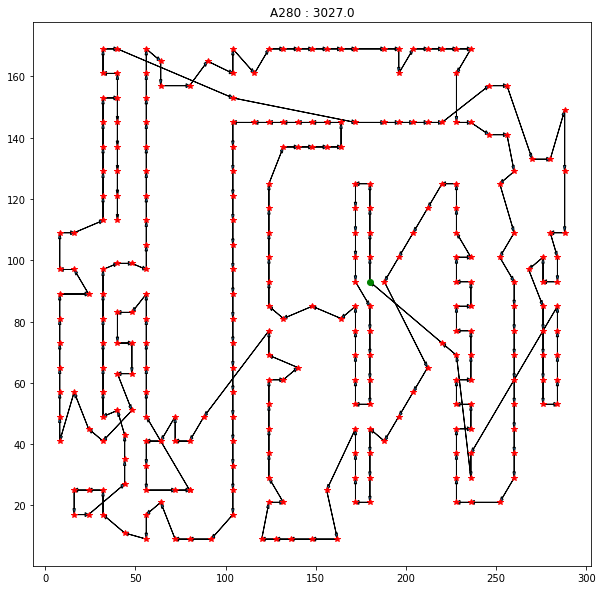

In [8]:
solucion_a280, coste_a280, estadisticas_a280 = grasp(10,semilla,a280)
representacion(solucion_a280, "A280", coste_a280)
agregar_resultados(estadisticas,"A280",estadisticas_a280)

---
# Estadísticas

In [9]:
estadisticas

St70                                  Ch130                  \
          S. ini S. opt Mej. S.      #Ev T(seg)  S. ini  S. opt Mej. S.   
It 1       840.0  775.0   775.0    24151   0.08  7659.0  7588.0  7588.0   
It 2       880.0  753.0   753.0    41056   0.11  7843.0  7661.0  7588.0   
It 3       866.0  770.0   753.0    24151   0.06  7468.0  7329.0  7329.0   
It 4       858.0  773.0   753.0    41056   0.12  7232.0  6992.0  6992.0   
It 5       866.0  762.0   753.0    28981   0.07  8324.0  8049.0  6992.0   
It 6       835.0  763.0   753.0    43471    0.1  8106.0  7916.0  6992.0   
It 7       868.0  762.0   753.0    26566   0.06  7777.0  7601.0  6992.0   
It 8       824.0  775.0   753.0    28981   0.07  6909.0  6789.0  6789.0   
It 9       867.0  762.0   753.0    43471   0.11  7951.0  7767.0  6789.0   
It 10      872.0  760.0   753.0    31396   0.08  7311.0  7191.0  6789.0   
Media      857.6  765.5   755.2  33328.0   0.09  7658.0  7488.3  7084.0   
Des. tip.  18.25   7.35    6.96  8033.88   0.02  431.73  405.04  309.66   
Sum            -      -       -   333280   0.86       -       -       -   

                              A280                                   
                #Ev T(seg)  S. ini  S. opt Mej. S.       #Ev T(seg)  
It 1          83851   0.27  3174.0  3095.0  3095.0    448001   1.25  
It 2         100621   0.24  3247.0  3142.0  3095.0    448001   1.18  
It 3         100621   0.24  3107.0  3027.0  3027.0    448001   1.23  
It 4         117391   0.29  3612.0  3453.0  3027.0    448001   1.18  
It 5         125776   0.33  3236.0  3045.0  3027.0    448001   1.25  
It 6         125776   0.33  3317.0  3245.0  3027.0    448001   1.25  
It 7          92236   0.24  3341.0  3195.0  3027.0    448001   1.13  
It 8          58696   0.15  3289.0  3216.0  3027.0    448001    1.2  
It 9          92236   0.29  3218.0  3135.0  3027.0    448001   1.21  
It 10         50311   0.13  3275.0  3181.0  3027.0    448001   1.15  
Media       94751.5   0.25  3281.6  3173.4  3040.6  448001.0    1.2  
Des. tip.  25631.84   0.07  134.75  121.18   28.67       0.0   0.04  
Sum          947515   2.51       -       -       -   4480010  12.03

In [10]:
estadisticas.to_csv("Resultados.csv")